In [1]:
%reload_ext nb_black

<IPython.core.display.Javascript object>

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn import linear_model

from sqlalchemy import create_engine
import statsmodels.api as sm


import warnings

# warnings.filterwarnings(action="ignore")

import config

<IPython.core.display.Javascript object>

## 1. Interpretation and significance

Suppose that you would like to know how much families in the US are spending on recreation annually. Use the following estimated model:

𝑒𝑥𝑝𝑒𝑛𝑑𝑖𝑡𝑢𝑟𝑒 = 873 + 0.0012𝑎𝑛𝑛𝑢𝑎𝑙_𝑖𝑛𝑐𝑜𝑚𝑒 + 0.0002𝑎𝑛𝑛𝑢𝑎𝑙_𝑖𝑛𝑐𝑜𝑚𝑒2 − 223.57ℎ𝑎𝑣𝑒_𝑘𝑖𝑑𝑠

Here, expenditure is the annual spending on recreation in US dollars, annual_income is the annual income in US dollars, and have_kids is a dummy variable indicating the families with children. Interpret the estimated coefficients. What additional statistics can be given in order to ensure that your interpretations make sense statistically? Write up your answer.

When observing the coefficients it is also important to determine their statistical significants. The corresponding t-stat and p-value for the coefficients should be provided to determine if they are significant.


* The bias term is 873
* On average families with kids spend 223.57 less on recreation. This is a dummy term, so it is on, or off.
* An annual income of, i.e. 10,000, would result in a contribution of 12 + 0.02*(10,000).
    * Here the 2nd term is squared. So, in increase in income increases this term by a power of 2, with its steapness mitigated by the coefficient, 0.000002.
The graph below show the relationship of income and rec spending

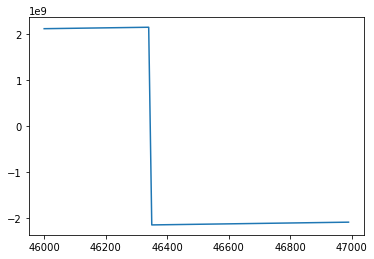

<IPython.core.display.Javascript object>

In [24]:
A = np.arange(46000, 47000, 10)
B = A * A
plt1 = plt.plot(A, B)
plt.show()

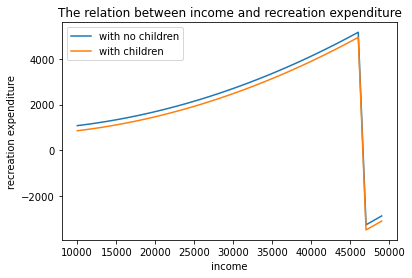

<IPython.core.display.Javascript object>

In [31]:
# X represents annual income
X = np.arange(10000, 50000, 1000)
# y is the modeled recreation spending without kids
y = 873 + 0.0012 * X + 0.000002 * (X ** 2)
# y_kids is the modeled recreation spending with kids
y_kids = (873 - 223.57) + 0.0012 * X + 0.000002 * (X ** 2)


plt1 = plt.plot(X, y, label="with no children")
plt2 = plt.plot(X, y_kids, label="with children")
plt.xlabel("income")
plt.ylabel("recreation expenditure")
plt.title("The relation between income and recreation expenditure")
plt.legend()
plt.show()

This is accurately graphed until the calculation breads down income equals about 46,000

## 2. Weather model

In this exercise, you'll work with the historical temperature data from the previous checkpoint. To complete this assignment, submit a link to a Jupyter Notebook containing your solutions to the following tasks:

* First, load the dataset from the weatherinszeged table from Thinkful's database.
* Build a linear regression model where your target variable is the difference between the apparenttemperature and the temperature. As explanatory variables, use humidity and windspeed. Now, estimate your model using OLS. Are the estimated coefficients statistically significant? Are the signs of the estimated coefficients in line with your previous expectations? Interpret the estimated coefficients. What are the relations between the target and the explanatory variables?
* Next, include the interaction of humidity and windspeed to the model above and estimate the model using OLS. Are the coefficients statistically significant? Did the signs of the estimated coefficients for humidity and windspeed change? Interpret the estimated coefficients

In [32]:
postgres_user = config.user
postgres_pw = config.password
postgres_host = config.host
postgres_port = config.port
postgres_db = "weatherinszeged"

engine = create_engine(
    "postgresql://{}:{}@{}:{}/{}".format(
        postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db
    )
)

df = pd.read_sql_query("select * from weatherinszeged", con=engine)

# No need for an open connection,
# because you're only doing a single query
engine.dispose()

<IPython.core.display.Javascript object>

In [33]:
y = df.apparenttemperature - df.temperature
X = df[["humidity", "windspeed"]]
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.288
Model:                            OLS   Adj. R-squared:                  0.288
Method:                 Least Squares   F-statistic:                 1.949e+04
Date:                Wed, 16 Dec 2020   Prob (F-statistic):               0.00
Time:                        18:37:09   Log-Likelihood:            -1.7046e+05
No. Observations:               96453   AIC:                         3.409e+05
Df Residuals:                   96450   BIC:                         3.409e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.4381      0.021    115.948      0.000       2.397       2.479
humidity      -3.0292      0.024   -126.479      0.000      -3.076      -2.982
windspeed     -0.1193      0.001   -176.164      0.000      -0.121      -0.118
==============================================================================
Omnibus:                     3935.747   Durbin-Watson:                   0.267
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4613.311
Skew:                          -0.478   Prob(JB):                         0.00
Kurtosis:                       3.484   Cond. No.                         88.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<IPython.core.display.Javascript object>

* The coefficients are all statistically significant, as shown by their p-values being < 0.05.
* As humidity increases the difference in temp and apparent temp also decreases. The increase in windspeed also decreases this difference. 

In [34]:
df["hum_wspeed_interaction"] = df["humidity"] * df["windspeed"]

X = df[["humidity", "windspeed", "hum_wspeed_interaction"]]
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.341
Model:                            OLS   Adj. R-squared:                  0.341
Method:                 Least Squares   F-statistic:                 1.666e+04
Date:                Wed, 16 Dec 2020   Prob (F-statistic):               0.00
Time:                        18:53:53   Log-Likelihood:            -1.6669e+05
No. Observations:               96453   AIC:                         3.334e+05
Df Residuals:                   96449   BIC:                         3.334e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0.0839      0.033      2.511      0.012       0.018       0.149
humidity                   0.1775      0.043      4.133      0.000       0.093       0.262
windspeed                  0.0905      0.002     36.797      0.000       0.086       0.095
hum_wspeed_interaction    -0.2971      0.003    -88.470      0.000      -0.304      -0.291
==============================================================================
Omnibus:                     4849.937   Durbin-Watson:                   0.265
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             9295.404
Skew:                          -0.378   Prob(JB):                         0.00
Kurtosis:                       4.320   Cond. No.                         193.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<IPython.core.display.Javascript object>

* All the coefs are statistically significant, as their p-values are < 0.05
* After adding the 'interaction term' the coefficients of the terms that made-up the interaction changed sign in this model.
* This effect of the individual terms in the interaction term acts to help throttle the effects of the oppisite term outside the interaction term. 

## 3. House prices model

In this exercise, you'll interpret your house prices model. To complete this assignment, submit a link to a Jupyter Notebook containing your solutions to the following tasks:

* Load the houseprices data from Thinkful's database.
* Run your house prices model again and interpret the results. Which features are statistically significant, and which are not?
* Now, exclude the insignificant features from your model. Did anything change?
* Interpret the statistically significant coefficients by quantifying their relations with the house prices. Which features have a more prominent effect on house prices?
* Do the results sound reasonable to you? If not, try to explain the potential reasons.

In [35]:
postgres_user = config.user
postgres_pw = config.password
postgres_host = config.host
postgres_port = config.port
postgres_db = "houseprices"

engine = create_engine(
    "postgresql://{}:{}@{}:{}/{}".format(
        postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db
    )
)

df = pd.read_sql_query("select * from houseprices", con=engine)

# No need for an open connection,
# because you're only doing a single query
engine.dispose()

<IPython.core.display.Javascript object>

In [36]:
df = pd.concat(
    [df, pd.get_dummies(df.condition1, prefix="condition1", drop_first=True)], axis=1
)
df = pd.concat(
    [df, pd.get_dummies(df.condition2, prefix="condition2", drop_first=True)], axis=1
)
dummy_cols = list(
    pd.get_dummies(df.condition1, prefix="condition1", drop_first=True).columns
)
dummy_cols = dummy_cols + list(
    pd.get_dummies(df.condition2, prefix="condition2", drop_first=True).columns
)

<IPython.core.display.Javascript object>

In [47]:
X = df[
    [
        "overallqual",
        "grlivarea",
        "garagecars",
        "garagearea",
        "totalbsmtsf",
    ]
    + dummy_cols
]
y = df.saleprice

<IPython.core.display.Javascript object>

In [38]:
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              saleprice   R-squared:                       0.772
Model:                            OLS   Adj. R-squared:                  0.769
Method:                 Least Squares   F-statistic:                     243.5
Date:                Wed, 16 Dec 2020   Prob (F-statistic):               0.00
Time:                        19:02:50   Log-Likelihood:                -17465.
No. Observations:                1460   AIC:                         3.497e+04
Df Residuals:                    1439   BIC:                         3.508e+04
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const            -1.093e+05   2.72e+04     -4.015      0.000   -1.63e+05   -5.59e+04
overallqual       2.293e+04   1075.527     21.322      0.000    2.08e+04     2.5e+04
grlivarea           48.2718      2.499     19.320      0.000      43.371      53.173
garagecars        1.239e+04   3006.773      4.120      0.000    6489.918    1.83e+04
garagearea          23.6586     10.385      2.278      0.023       3.288      44.029
totalbsmtsf         31.6301      2.881     10.980      0.000      25.979      37.281
condition1_Feedr  1.064e+04   7192.319      1.480      0.139   -3465.783    2.48e+04
condition1_Norm   2.518e+04   5843.632      4.309      0.000    1.37e+04    3.66e+04
condition1_PosA   1.861e+04   1.47e+04      1.265      0.206   -1.02e+04    4.75e+04
condition1_PosN   1.916e+04   1.09e+04      1.754      0.080   -2266.670    4.06e+04
condition1_RRAe   4081.2714   1.29e+04      0.317      0.751   -2.12e+04    2.94e+04
condition1_RRAn   2.037e+04   9806.080      2.078      0.038    1138.066    3.96e+04
condition1_RRNe   1.475e+04   2.76e+04      0.534      0.594   -3.94e+04    6.89e+04
condition1_RRNn   2.495e+04   1.84e+04      1.356      0.175   -1.12e+04     6.1e+04
condition2_Feedr   -3.6e+04   3.24e+04     -1.111      0.267   -9.96e+04    2.76e+04
condition2_Norm  -1.216e+04   2.77e+04     -0.439      0.661   -6.65e+04    4.22e+04
condition2_PosA  -1.366e+04   4.73e+04     -0.289      0.773   -1.06e+05    7.92e+04
condition2_PosN   -1.62e+05   4.01e+04     -4.041      0.000   -2.41e+05   -8.33e+04
condition2_RRAe  -3.445e+04   4.74e+04     -0.726      0.468   -1.27e+05    5.86e+04
condition2_RRAn  -5.056e+04   4.74e+04     -1.068      0.286   -1.43e+05    4.23e+04
condition2_RRNn   8585.1105    3.9e+04      0.220      0.826   -6.79e+04    8.51e+04
==============================================================================
Omnibus:                      411.281   Durbin-Watson:                   1.979
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            39247.829
Skew:                          -0.100   Prob(JB):                         0.00
Kurtosis:                      28.399   Cond. No.                     1.66e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.66e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

<IPython.core.display.Javascript object>

In [50]:
X = df[
    [
        "overallqual",
        "grlivarea",
        "garagecars",
        "garagearea",
        "totalbsmtsf",
    ]
    + dummy_cols
]
y = df.saleprice

<IPython.core.display.Javascript object>

In [51]:
X.shape

(1460, 20)

<IPython.core.display.Javascript object>

In [52]:
# Drop any columns that don't contribute as ID'd
# by a p-value > 0.05 in the summary above
droplist = [
    "condition1_Feedr",
    "condition1_PosA",
    "condition1_RRAe",
    "condition1_RRNe",
    "condition1_RRNn",
    "condition2_Feedr",
    "condition2_Norm",
    "condition2_PosA",
    "condition2_RRAe",
    "condition2_RRAn",
    "condition2_RRNn",
]

X = X.drop(droplist, axis=1)
display(X.shape)
X.head(3)

(1460, 9)

,overallqual,grlivarea,garagecars,garagearea,totalbsmtsf,condition1_Norm,condition1_PosN,condition1_RRAn,condition2_PosN
0,7,1710,2,548,856,1,0,0,0
1,6,1262,2,460,1262,0,0,0,0
2,7,1786,2,608,920,1,0,0,0


<IPython.core.display.Javascript object>

In [53]:
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              saleprice   R-squared:                       0.771
Model:                            OLS   Adj. R-squared:                  0.769
Method:                 Least Squares   F-statistic:                     541.5
Date:                Wed, 16 Dec 2020   Prob (F-statistic):               0.00
Time:                        20:25:39   Log-Likelihood:                -17469.
No. Observations:                1460   AIC:                         3.496e+04
Df Residuals:                    1450   BIC:                         3.501e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const           -1.143e+05   5158.480    -22.157      0.000   -1.24e+05   -1.04e+05
overallqual      2.298e+04   1062.690     21.624      0.000    2.09e+04    2.51e+04
grlivarea          48.0242      2.476     19.393      0.000      43.167      52.882
garagecars       1.256e+04   2979.111      4.216      0.000    6716.210    1.84e+04
garagearea         23.3712     10.306      2.268      0.023       3.155      43.588
totalbsmtsf        31.9313      2.858     11.172      0.000      26.325      37.538
condition1_Norm  1.756e+04   3309.170      5.307      0.000    1.11e+04    2.41e+04
condition1_PosN  1.159e+04   9780.675      1.185      0.236   -7593.999    3.08e+04
condition1_RRAn  9102.4038   8129.433      1.120      0.263   -6844.303     2.5e+04
condition2_PosN -1.501e+05   2.88e+04     -5.206      0.000   -2.07e+05   -9.35e+04
==============================================================================
Omnibus:                      406.273   Durbin-Watson:                   1.973
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            37184.133
Skew:                          -0.078   Prob(JB):                         0.00
Kurtosis:                      27.723   Cond. No.                     5.81e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.81e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

<IPython.core.display.Javascript object>

Let's drop some more.

In [54]:
droplist2 = [
    "condition1_PosN",
    "condition1_RRAn",
    "garagearea",
]

X = X.drop(droplist2, axis=1)
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              saleprice   R-squared:                       0.770
Model:                            OLS   Adj. R-squared:                  0.769
Method:                 Least Squares   F-statistic:                     808.7
Date:                Wed, 16 Dec 2020   Prob (F-statistic):               0.00
Time:                        20:30:37   Log-Likelihood:                -17473.
No. Observations:                1460   AIC:                         3.496e+04
Df Residuals:                    1453   BIC:                         3.500e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const           -1.127e+05   5050.643    -22.306      0.000   -1.23e+05   -1.03e+05
overallqual      2.298e+04   1061.517     21.645      0.000    2.09e+04    2.51e+04
grlivarea          48.4055      2.470     19.596      0.000      43.560      53.251
garagecars       1.815e+04   1716.802     10.573      0.000    1.48e+04    2.15e+04
totalbsmtsf        33.2398      2.796     11.887      0.000      27.755      38.725
condition1_Norm  1.512e+04   2968.856      5.092      0.000    9293.822    2.09e+04
condition2_PosN  -1.37e+05   2.75e+04     -4.981      0.000   -1.91e+05    -8.3e+04
==============================================================================
Omnibus:                      394.340   Durbin-Watson:                   1.969
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            32414.481
Skew:                          -0.002   Prob(JB):                         0.00
Kurtosis:                      26.083   Cond. No.                     5.33e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.33e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

<IPython.core.display.Javascript object>

* Shaving off variables revealed more insignificant variables and increased the effect of the remaining coefficients
* It looks like the contributors with the most weight is the 'condition2_PosN', for the dummy variables, and 'overallqual' and 'garagecars', for the numerical varialbles.


In [56]:
!pip install xgboost

<IPython.core.display.Javascript object>